In [368]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Here we have a dataset of startup funding via Crunchbase

Link to dataset: https://www.kaggle.com/arindam235/startup-investments-crunchbase#investments_VC.csv

In [422]:
df = pd.read_csv('investments_VC.csv', encoding= 'unicode_escape')
print("Length of df: {}".format(len(df)))
print("Number of features: {}".format(len(df.columns)))
df.head()

Length of df: 54294
Number of features: 39


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [423]:
print(f"Columns: {', '.join(df.columns)}")

Columns: permalink, name, homepage_url, category_list, market, funding_total_usd, status, country_code, state_code, region, city, funding_rounds, founded_at, founded_month, founded_quarter, founded_year, first_funding_at, last_funding_at, seed, venture, equity_crowdfunding, undisclosed, convertible_note, debt_financing, angel, grant, private_equity, post_ipo_equity, post_ipo_debt, secondary_market, product_crowdfunding, round_A, round_B, round_C, round_D, round_E, round_F, round_G, round_H


# The goals of this analysis is to:
#### 1: Clean the data, remove outliers, pick subsets to work with
#### 1: Understand the general trends of the startup ecosystem
#### 2: Gather statistics by features, and look deeper at features in general
#### 3: Find patterns in the data that reflect success/failure of a startup

# Let's try to clean up the data a little bit and choose GOOD samle dataset 
And maybe find some outliers ;)

In [424]:
print("Length of df BEFORE dropping all null rows: {}".format(len(df)))
df = df.dropna(axis=0, how='all')
print("Length of df AFTER dropping all null rows: {}".format(len(df)))

Length of df BEFORE dropping all null rows: 54294
Length of df AFTER dropping all null rows: 49438


In [425]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Some data cleaning and data type modifications

In [426]:
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: x.replace(',',''))
df['market'] = df['market'].dropna().apply(lambda x: x.replace(' ', ''))
df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: np.nan if '-' in x else x)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])

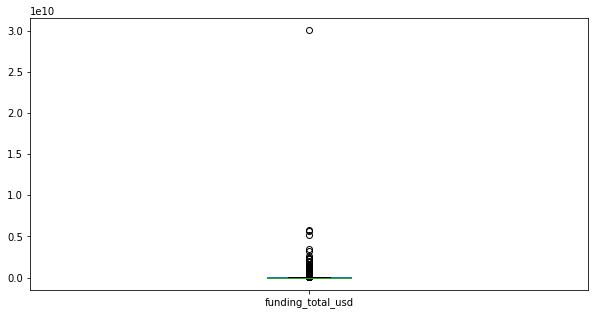

In [428]:
df['funding_total_usd'].plot(kind='box')

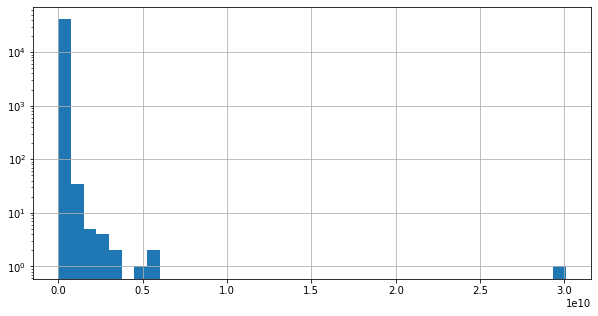

In [433]:
df['funding_total_usd'].hist(bins=40, log=True)

In [259]:
more_thana_b = df[df['funding_total_usd'] > 1000000000]
print(f"We have {len(more_thana_b)} companies that raised more than a billion")

We have 32 companies that raised more than a billion


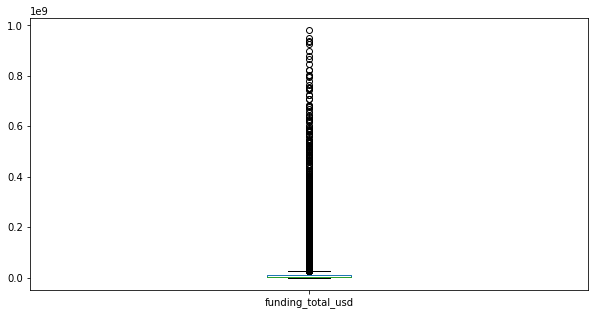

In [260]:
# Less than a billion dollars in funding
df[df['funding_total_usd'] < 1000000000]['funding_total_usd'].plot(kind='box')

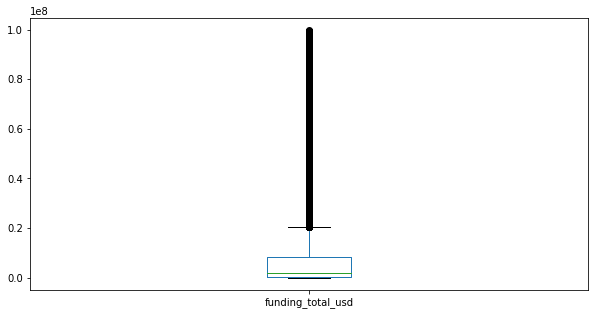

In [261]:
# Less than 100 million
df[df['funding_total_usd'] < 100000000]['funding_total_usd'].plot(kind='box')

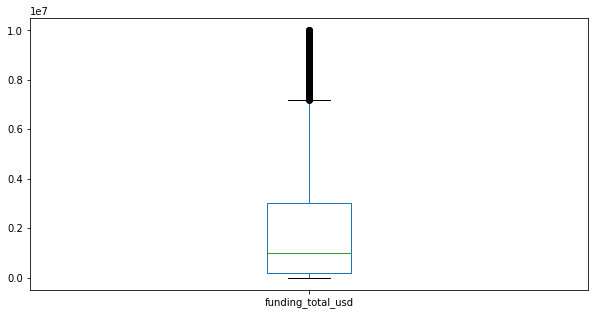

In [262]:
# Less than 10 million
df[df['funding_total_usd'] < 10000000]['funding_total_usd'].plot(kind='box')

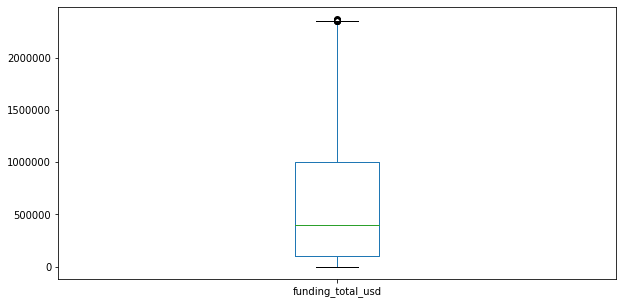

In [263]:
# Less than 2.37 million, this one looks good!
df[df['funding_total_usd'] < 2370000]['funding_total_usd'].plot(kind='box')

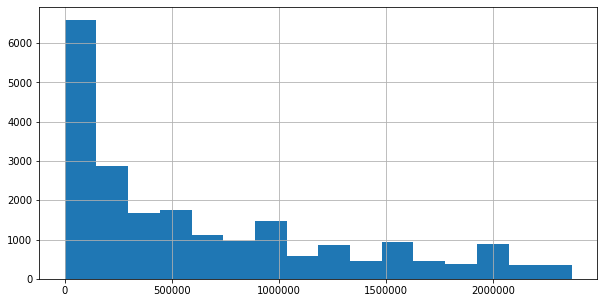

In [432]:
df[df['funding_total_usd'] < 2370000]['funding_total_usd'].hist(bins=16)

# General Trends in the Startup Ecosystem as a whole

## Looking at the whole dataset, what is the success/failure ratio?

In [265]:
g_status = df['status'].dropna().value_counts()
total_num = len(df['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num


print("Percentages for the status of startups everywhere")
print("-------------------------------------------------")
print(f'% operating: {round(o_per, 3)*100}%')
print(f'% acquired: {round(a_per, 3)*100}%')
print(f'% closed: {round(c_per, 3)*100}%')

Percentages for the status of startups everywhere
-------------------------------------------------
% operating: 86.9%
% acquired: 7.7%
% closed: 5.4%


#### This shows the opposite of what the saying is, that 95% of startups are still operating or have been aquired.
But if you consider success as being aquired, then we get only 8%. Up to personal definition I guess!

In [266]:
cities = df['city'].dropna()

In [267]:
cities

0                  New York
1               Los Angeles
2                   Tallinn
3                    London
4                Fort Worth
                ...        
49432    Gerasdorf Bei Wien
49433                London
49434               Beijing
49435                 Split
49437              New York
Name: city, Length: 43322, dtype: object

In [268]:
top_20_cities = cities.value_counts()[:20]

In [269]:
not_top_20_citites = cities.value_counts()[20:]

In [270]:
top_2_cities = cities.value_counts()[:20]

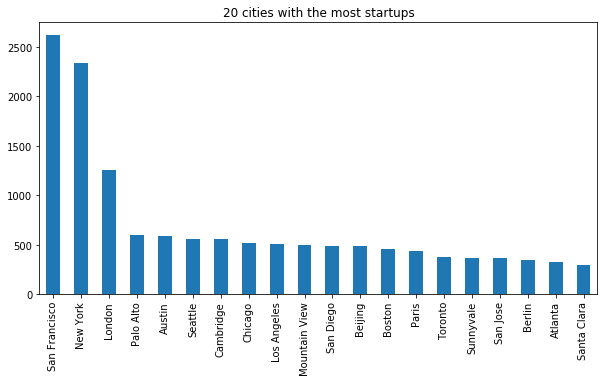

In [271]:
plt.rcParams["figure.figsize"] = (10,5)
_= cities.value_counts()[:20].plot(kind='bar', title="20 cities with the most startups")

In [272]:
sups_top_20_cities = df[df['city'].isin(list(top_20_cities.index))]

In [273]:
sups_top_20_cities['status'].value_counts()

operating    11372
acquired      1570
closed         749
Name: status, dtype: int64

In [274]:
sups_not_top_20_cities = df[df['city'].isin(list(not_top_20_citites.index))]

In [275]:
sups_not_top_20_cities['status'].value_counts()

operating    25291
acquired      1872
closed        1413
Name: status, dtype: int64

In [276]:
sups_top2_cities = df[df['city'].isin(list(top_2_cities.index))]

In [277]:
sups_top2_cities['status'].value_counts()

operating    11372
acquired      1570
closed         749
Name: status, dtype: int64

## Now let's look at the same success to failure ratios as before, but for the 20 cities with the most startups

In [278]:
# Cities in the top 20

g_status = sups_top_20_cities['status'].dropna().value_counts()
total_num = len(sups_top_20_cities['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num

print("Percentages for the status of startups in the top 20 cities")
print("-----------------------------------------------------------")
print(f'% operating: {round(o_per, 3)*100}%')
print(f'% acquired: {round(a_per, 3)*100}%')
print(f'% closed: {round(c_per, 3)*100}%')

Percentages for the status of startups in the top 20 cities
-----------------------------------------------------------
% operating: 83.1%
% acquired: 11.5%
% closed: 5.5%


# And for cities not in the top 20

In [279]:
# Cities not in the top 20

g_status = sups_not_top_20_cities['status'].dropna().value_counts()
total_num = len(sups_not_top_20_cities['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num

print("Percentages for the status of startups not in the top 20 cities")
print("---------------------------------------------------------------")
print(f'% operating: {round(o_per, 5)*100}%')
print(f'% acquired: {round(a_per, 5)*100}%')
print(f'% closed: {round(c_per, 5)*100}%')

Percentages for the status of startups not in the top 20 cities
---------------------------------------------------------------
% operating: 88.504%
% acquired: 6.551%
% closed: 4.945%


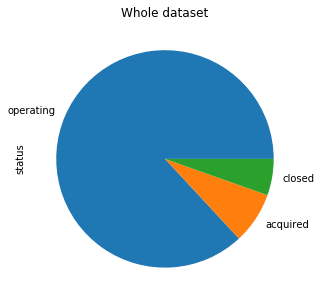

In [415]:
g_status = df['status'].dropna().value_counts().plot(kind='pie', title='Whole dataset')

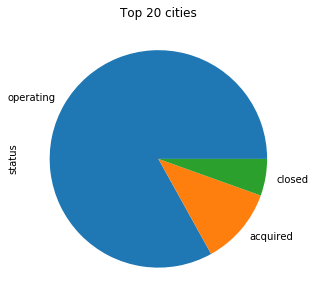

In [413]:
_= sups_top_20_cities['status'].dropna().value_counts().plot(kind='pie', title='Top 20 cities')

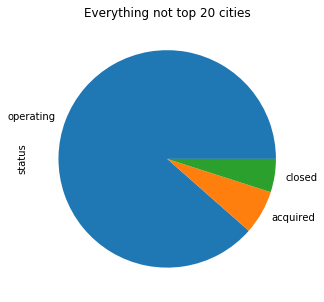

In [414]:
_= sups_not_top_20_cities['status'].dropna().value_counts().plot(kind='pie', title='Everything not top 20 cities')

# To see if culture really affects startup success, let's look at the top 2

In [280]:
# Top 2 cities

g_status = sups_top2_cities['status'].dropna().value_counts()
total_num = len(sups_top2_cities['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num

print("Percentages for the status of startups in the top 2 cities")
print("----------------------------------------------------------")
print(f'% operating: {round(o_per, 2)*100}%')
print(f'% acquired: {round(a_per, 3)*100}%')
print(f'% closed: {round(c_per, 3)*100}%')

Percentages for the status of startups in the top 2 cities
----------------------------------------------------------
% operating: 83.0%
% acquired: 11.5%
% closed: 5.5%


## All of these combined into one for presentation

In [281]:
g_status = df['status'].dropna().value_counts()
total_num = len(df['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num


print("Percentages for the status of startups everywhere")
print("-------------------------------------------------")
print(f'% operating: {round(o_per, 3)*100}%')
print(f'% acquired: {round(a_per, 3)*100}%')
print(f'% closed: {round(c_per, 3)*100}%')
print("-------------------------------------------------")

# Cities in the top 20

g_status = sups_top_20_cities['status'].dropna().value_counts()
total_num = len(sups_top_20_cities['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num

print("Percentages for the status of startups in the top 20 cities")
print("-----------------------------------------------------------")
print(f'% operating: {round(o_per, 3)*100}%')
print(f'% acquired: {round(a_per, 3)*100}%')
print(f'% closed: {round(c_per, 3)*100}%')
print("-------------------------------------------------")

# Cities not in the top 20

g_status = sups_not_top_20_cities['status'].dropna().value_counts()
total_num = len(sups_not_top_20_cities['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num

print("Percentages for the status of startups not in the top 20 cities")
print("---------------------------------------------------------------")
print(f'% operating: {round(o_per, 5)*100}%')
print(f'% acquired: {round(a_per, 5)*100}%')
print(f'% closed: {round(c_per, 5)*100}%')
print("-------------------------------------------------")

# Top 2 cities

g_status = sups_top2_cities['status'].dropna().value_counts()
total_num = len(sups_top2_cities['status'].dropna())
o_per = g_status['operating'] / total_num
a_per = g_status['acquired'] / total_num
c_per = g_status['closed'] / total_num
s_to_f = (g_status['operating'] + g_status['acquired']) / total_num
a_to_all = (g_status['acquired']) / total_num

print("Percentages for the status of startups in the top 2 cities")
print("----------------------------------------------------------")
print(f'% operating: {round(o_per, 2)*100}%')
print(f'% acquired: {round(a_per, 3)*100}%')
print(f'% closed: {round(c_per, 3)*100}%')
print("-------------------------------------------------")

Percentages for the status of startups everywhere
-------------------------------------------------
% operating: 86.9%
% acquired: 7.7%
% closed: 5.4%
-------------------------------------------------
Percentages for the status of startups in the top 20 cities
-----------------------------------------------------------
% operating: 83.1%
% acquired: 11.5%
% closed: 5.5%
-------------------------------------------------
Percentages for the status of startups not in the top 20 cities
---------------------------------------------------------------
% operating: 88.504%
% acquired: 6.551%
% closed: 4.945%
-------------------------------------------------
Percentages for the status of startups in the top 2 cities
----------------------------------------------------------
% operating: 83.0%
% acquired: 11.5%
% closed: 5.5%
-------------------------------------------------


# We split up data based on these box-plots and analyze them differently!
### But you can see, that if we look at the funding total, the box plot shows that data below 2.37 million has barely any outliers!

In [264]:
majority_df = df[df['funding_total_usd'] <= 2370000] # This is data without any outliers
outliers = df[df['funding_total_usd'] > 2370000] # This is the outliers, or more than 2.37 million in total funding
unicorns = df[df['funding_total_usd'] > 1000000000] # More than a billion in funding

# Now, lets dive deeper into looking at the different features of the datasets
## We will look at this by the three different dataframes we created earlier

In [417]:
print(f'Length of good dataset(no outliers): {len(majority_df)}')
print(f'Length of the outlier dataset: {len(outliers)}')
print(f'Length of the unicorn dataset(>billion in funding): {len(unicorns)}')

Length of good dataset(no outliers): 21716
Length of the outlier dataset: 19191
Length of the unicorn dataset(>billion in funding): 32


### Let's look at the average funding in these datasets

In [283]:
print(f"${round(majority_df['funding_total_usd'].mean(), 0)} - Average funding for good dataset/majority")
print(f"${round(outliers['funding_total_usd'].mean(), 0)} - Average funding for outliers(more than 2.37 million in funding)")
print(f"${round(unicorns['funding_total_usd'].mean(), 0)} - Average funding for unicorns") 

$645684.0 - Average funding for good dataset/majority
$33188059.0 - Average funding for outliers(more than 2.37 million in funding)
$2906744750.0 - Average funding for unicorns


### Let's look at the respective markets in these datasets

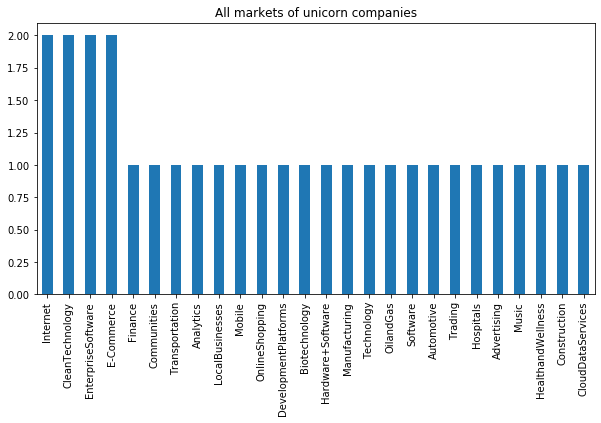

In [324]:
_= unicorns['market'].dropna().value_counts().plot(kind='bar', title='All markets of unicorn companies')

In [286]:
unicorns[unicorns['market'] == 'Biotechnology']['name']

7328    Carestream
Name: name, dtype: object

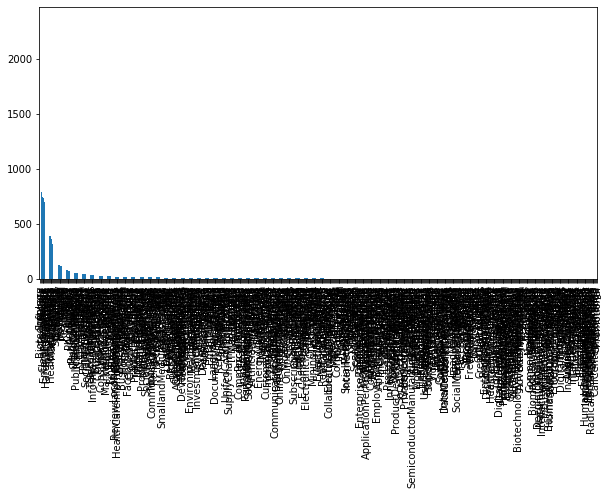

In [287]:
outliers['market'].dropna().value_counts().plot(kind='bar')

## Turns out theres a shit ton of markets, so lets only look at the ones that have above a specific count

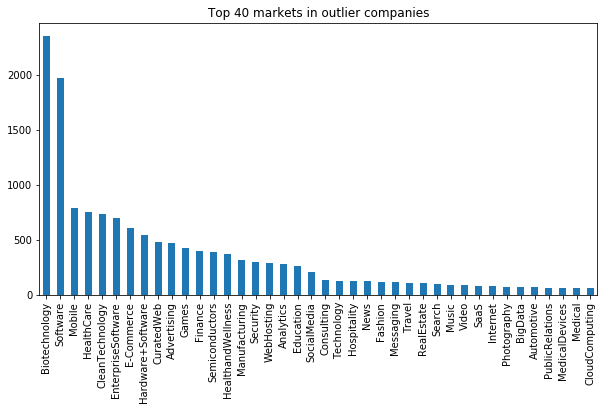

In [323]:
_= outliers['market'].dropna().value_counts()[:40].plot(kind='bar', title='Top 40 markets in outlier companies')

## Biotechnology is at #1! interesting....

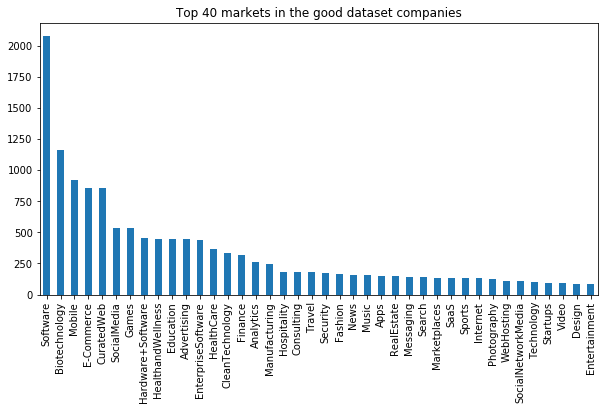

In [326]:
_= majority_df['market'].dropna().value_counts()[:40].plot(kind='bar', title='Top 40 markets in the good dataset companies')

### Let's look the funding by market

In [296]:
df[df['market'] == 'Biotechnology']['funding_total_usd'].mean()

20838667.523146834

In [297]:
df[df['market'] != 'Biotechnology']['funding_total_usd'].mean()

15448583.822687637

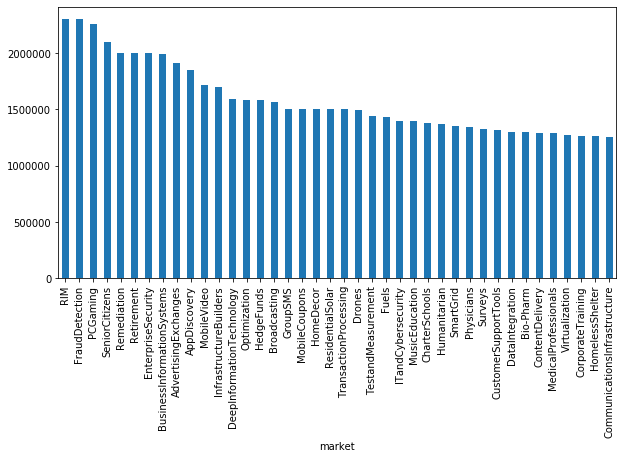

In [331]:
# For the good group
market_group = majority_df.groupby(['market'])['funding_total_usd']
_= market_group.mean().dropna().sort_values(ascending=False)[:40].plot(kind='bar')

#RIM means Remote Infrastructure management

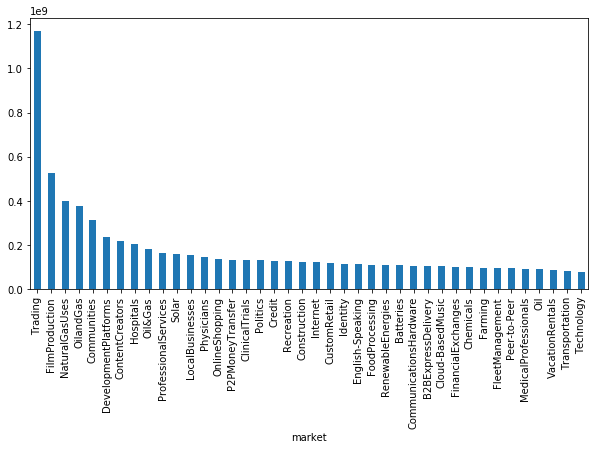

In [333]:
# For the outliers
market_group = outliers.groupby(['market'])['funding_total_usd']
_= market_group.mean().dropna().sort_values(ascending=False)[:40].plot(kind='bar')

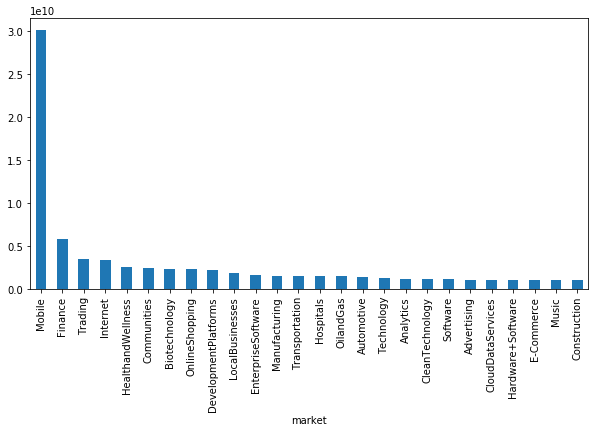

In [334]:
# For the unicorns
market_group = unicorns.groupby(['market'])['funding_total_usd']
_= market_group.mean().dropna().sort_values(ascending=False)[:40].plot(kind='bar')

### Takeaways:
### Even though the Biotechnology market was the among the top ones in the 'good' dataset and the outliers, it was not the market that got the most investment by far

# Let's see which markets had the most closures and acquisitions

In [346]:
status_group = majority_df.groupby(['status'])['market']

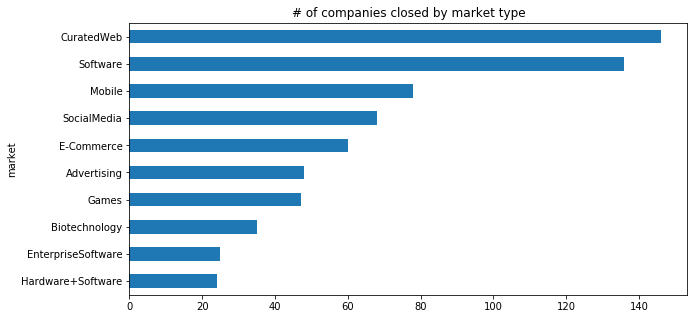

In [362]:
_= status_group.value_counts()['closed'][:10].sort_values().plot(kind='barh', title='# of companies closed by market type')

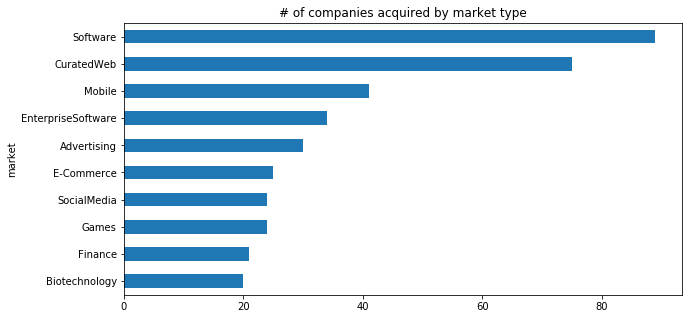

In [359]:
_= status_group.value_counts()['acquired'][:10].sort_values().plot(kind='barh', title='# of companies acquired by market type')

In [358]:
df[df['market'] == 'CuratedWeb'].sort_values(by='funding_total_usd', ascending=False)[:10]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
32427,/organization/pinterest,Pinterest,http://pinterest.com,|Curated Web|Social Bookmarking|Social Media|,CuratedWeb,762500000.0,operating,USA,CA,SF Bay Area,...,0.0,0.0,10000000.0,27000000.0,100000000.0,200000000.0,225000000.0,200000000.0,0.0,0.0
38527,/organization/sina-weibo,Sina Weibo,http://us.weibo.com,|Curated Web|,CuratedWeb,586000000.0,operating,CHN,NaN,CHN - Other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19384,/organization/houzz,Houzz,http://www.houzz.com,|Home Renovation|Design|Curated Web|,CuratedWeb,213600000.0,operating,USA,CA,SF Bay Area,...,0.0,0.0,2000000.0,11600000.0,35000000.0,165000000.0,0.0,0.0,0.0,0.0
34515,/organization/quikr-india,Quikr India,http://www.quikr.com,|Curated Web|,CuratedWeb,196000000.0,operating,IND,NaN,Mumbai,...,0.0,0.0,0.0,0.0,6000000.0,8000000.0,32000000.0,90000000.0,60000000.0,0.0
25197,/organization/mail-ru,Mail.Ru Group,http://www.mail.ru,|Curated Web|,CuratedWeb,165000000.0,operating,RUS,NaN,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16904,/organization/geosign,Geosign,NaN,|Curated Web|,CuratedWeb,160000000.0,operating,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43201,/organization/thumbtack,Thumbtack,http://www.thumbtack.com,|Service Providers|Curated Web|,CuratedWeb,148200000.0,operating,USA,CA,SF Bay Area,...,0.0,0.0,4500000.0,12500000.0,30000000.0,100000000.0,0.0,0.0,0.0,0.0
17837,/organization/green-apple-media,Green Apple Media,http://www.greenapplemedia.ie,|Curated Web|,CuratedWeb,132000000.0,operating,IRL,NaN,Dublin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6488,/organization/brookstone,Brookstone,http://www.brookstone.com,|Curated Web|,CuratedWeb,125612000.0,operating,USA,NH,"Manchester, New Hampshire",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13087,/organization/eharmony,eHarmony,http://eharmony.com,|Curated Web|,CuratedWeb,113000000.0,operating,USA,CA,Los Angeles,...,0.0,0.0,3000000.0,110000000.0,0.0,0.0,0.0,0.0,0.0,0.0


# Takeaways:
### High risk for all of the top 10 closed but also high reward. Both top 10 are very similar

# Let's compare the sets of companies who were acquired or closed down

In [ ]:
# Let's do a null hypothesis test on the companies that closed and got aquired by their funding dataset
### We are going to use the z-test with an alpha value of .05
### We want to be able to say with a 95% confidence that there is a difference between the two sets

In [373]:
closed_set = majority_df[majority_df['status'] == 'closed']['funding_total_usd']

In [375]:
acquired_set = majority_df[majority_df['status'] == 'acquired']['funding_total_usd']

In [384]:
from scipy import stats
alpha_value = .05
t_value, p_value = stats.ttest_ind(list(closed_set), list(acquired_set))

print(f'p-value for closed vs acquired: {p_value}')

if p_value < alpha_value:
    print("We reject the null hypothesis, two samples are different")

p-value for closed vs acquired: 8.887340186426698e-53
We reject the null hypothesis, two samples are different


In [385]:
print(f'Average funding total for acquired: {acquired_set.mean()}')
print(f'Average funding total for closed: {closed_set.mean()}')

Average funding total for acquired: 1004028.7787839586
Average funding total for closed: 554270.8671532847


## Average funding for acquired: 1,004,028
## Average funding for closed: 554, 270 

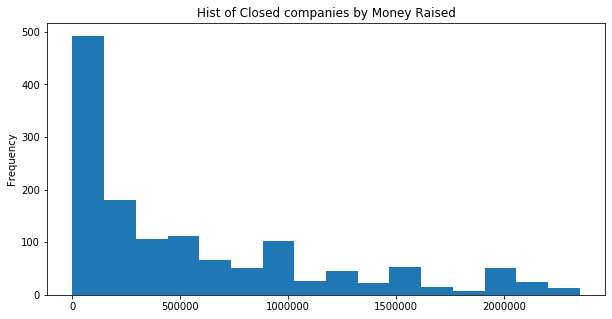

In [416]:
_= majority_df[majority_df['status'] == 'closed']['funding_total_usd'].plot(kind='hist', bins=16, title="Hist of Closed companies by Money Raised")

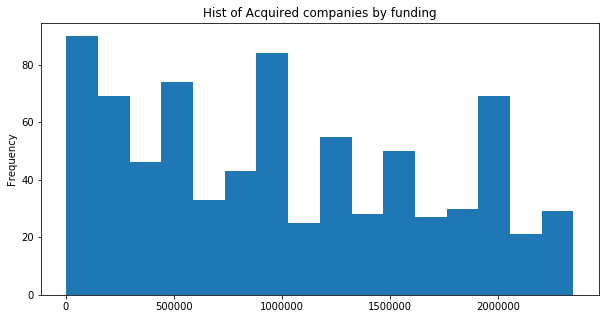

In [398]:
_= majority_df[majority_df['status'] == 'acquired']['funding_total_usd'].plot(kind='hist', bins=16, title="Hist of Acquired companies by funding")

In [434]:
unicorns['']

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
1868,/organization/alibaba,Alibaba,http://www.alibaba.com,|E-Commerce|,E-Commerce,1.112000e+09,operating,CHN,NaN,Hangzhou,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
7107,/organization/cape-wind,Cape Wind,http://capewind.org,|Clean Technology|,CleanTechnology,1.200000e+09,operating,USA,MA,Boston,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
7234,/organization/cardinal-health,Cardinal Health,http://www.cardinal.com,|Health and Wellness|Hospitals|Health Care|,Hospitals,1.500000e+09,operating,USA,OH,"Columbus, Ohio",...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
7328,/organization/carestream-health,Carestream,http://www.carestream.com,|Biotechnology|,Biotechnology,2.400000e+09,operating,USA,NY,"Rochester, New York",...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
7977,/organization/charter-communications,Charter Communications,http://www.charter.com,NaN,NaN,5.162513e+09,operating,USA,CT,Hartford,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
8664,/organization/clearwire,Clearwire,http://www.clearwire.com,|Internet|Mobile|,Internet,5.700000e+09,acquired,USA,WA,Seattle,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
8889,/organization/cloudera,Cloudera,http://www.cloudera.com,|Analytics|Big Data|Software|Enterprise Software|,Analytics,1.201000e+09,operating,USA,CA,SF Bay Area,...,0.0,0.0,5000000.0,6000000.0,25000000.0,4.000000e+07,65000000.0,1.060000e+09,0.000000e+00,0.0
9155,/organization/cofco,COFCO,http://cofco.com,NaN,NaN,3.200000e+09,operating,CHN,NaN,CHN - Other,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
12375,/organization/dropbox,Dropbox,http://www.dropbox.com,|Cloud Data Services|Storage|Web Hosting|,CloudDataServices,1.107215e+09,operating,USA,CA,SF Bay Area,...,0.0,0.0,7200000.0,250000000.0,350000000.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
14705,/organization/facebook,Facebook,http://facebook.com,|Communities|Identity|All Students|Colleges|Fa...,Communities,2.425700e+09,operating,USA,CA,SF Bay Area,...,0.0,0.0,12700000.0,27500000.0,375000000.0,2.000000e+08,0.0,0.000000e+00,0.000000e+00,0.0


# Thank you for your attention. Here are the key takeaways:
* A little bit less half of the startups were part of the outliers
* Being part of the culture is important 
* Getting at least some funding is probably going to improve your chances. 
* Even companies that get more than a billion dollars in investment can shut down
* Biotech surprisingly is a very popular market